### The effect of the size of the training and test sets on model accuracy

#### Import modules and read data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
normal_data = pd.read_csv(os.getcwd() + '/Data/brain_tumour_normalized.csv')
normal_data.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
0,Image1,0.194705,0.212023,0.443074,0.274801,0.068211,0.010937,0.028236,0.475410,0.246092,0.603108,0.139694,0.981764,0.0,0
1,Image2,0.261489,0.276124,0.510114,0.674843,0.052278,0.007693,0.017951,0.797096,0.648383,0.773800,0.093527,0.997417,0.0,0
2,Image3,0.219003,0.392326,0.614200,0.001487,0.090618,0.016478,0.023280,0.012719,0.001173,0.230760,0.195261,0.972855,0.0,1
3,Image4,0.177300,0.329007,0.559750,0.001513,0.108202,0.021559,0.043805,0.012908,0.001192,0.196137,0.258588,0.941475,0.0,1
4,Image5,0.218223,0.249840,0.483677,0.370574,0.068403,0.011067,0.050836,0.564860,0.338854,0.560862,0.226679,0.960995,0.0,0


In [3]:
X, Y = normal_data[normal_data.columns[1 : 14]], normal_data[normal_data.columns[-1]]
X.shape, Y.shape

((3762, 13), (3762,))

#### Train/Test Split Size vs Accuracy

In [47]:
def sizeEffect(model, sizes, name):
    scores = []
    
    for size in sizes:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = size, random_state = 42)  # create splits
#         print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
        
        model.fit(X_train, Y_train)  # train model
        
        acc = model.score(X_test, Y_test)
        scores.append(acc)
#         print(acc)

#     print(scores)

    scores = np.array(scores)
    avg, median = np.mean(scores), np.median(scores)
    
    plt.plot(sizes, scores, color = '#552583', marker = 'o')
    plt.plot(sizes, [avg] * len(sizes), color = '#ff8b00', label = 'Mean accuracy')  #, alpha = 0.3)
    plt.plot(sizes, [median] * len(sizes), color = '#1c39bb', label = 'Median accuracy')  #, alpha = 0.3)
    plt.xticks(np.round(sizes, 2), rotation = 45)
    plt.grid()
    plt.title('Train/Test Split Size vs Accuracy: ' + name)
    plt.xlabel('Test Set Size (% of total data)')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    plt.close()
    
    print('Mean:', avg)
    print('Median:', median)

Logistic Regression

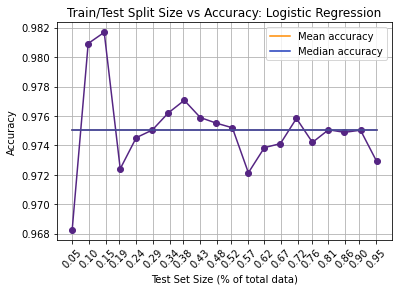

Mean: 0.9750419936338334
Median: 0.9750414607202087


In [48]:
logisticRegr = LogisticRegression()  # create model

sizes = np.linspace(0.05, 1, num = 20, endpoint = False)  # test set sizes

sizeEffect(logisticRegr, sizes, 'Logistic Regression')

SVM - RBF Kernel

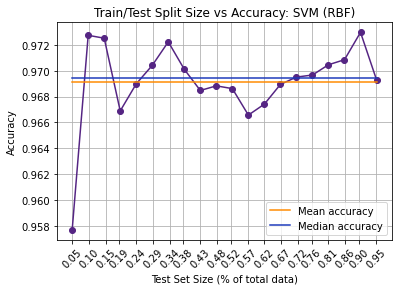

Mean: 0.9691665162400259
Median: 0.9694123821694105


In [49]:
svm_rbf = SVC(kernel = 'rbf', gamma = 'auto')  # create model

sizes = np.linspace(0.05, 1, num = 20, endpoint = False)  # test set sizes

sizeEffect(svm_rbf, sizes, 'SVM (RBF)')

SVM - Sigmoid Kernel

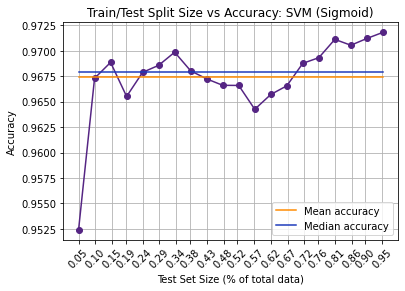

Mean: 0.9674110129586255
Median: 0.9679590924237562


In [50]:
svm_sigmoid = SVC(kernel = 'sigmoid', gamma = 'auto')  # create model

sizes = np.linspace(0.05, 1, num = 20, endpoint = False)  # test set sizes

sizeEffect(svm_sigmoid, sizes, 'SVM (Sigmoid)')

SVM - Linear

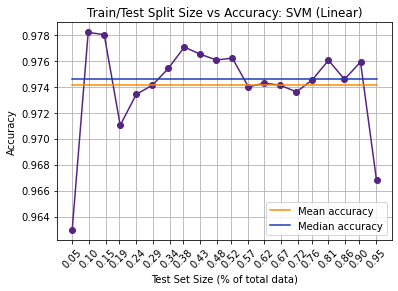

Mean: 0.9741482213014929
Median: 0.974568559696108


In [51]:
svm_linear = SVC(kernel = 'linear', gamma = 'auto')  # create model

sizes = np.linspace(0.05, 1, num = 20, endpoint = False)  # test set sizes

sizeEffect(svm_linear, sizes, 'SVM (Linear)')